# K Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('College_Data')

In [3]:
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

<AxesSubplot:xlabel='Room.Board', ylabel='Grad.Rate'>

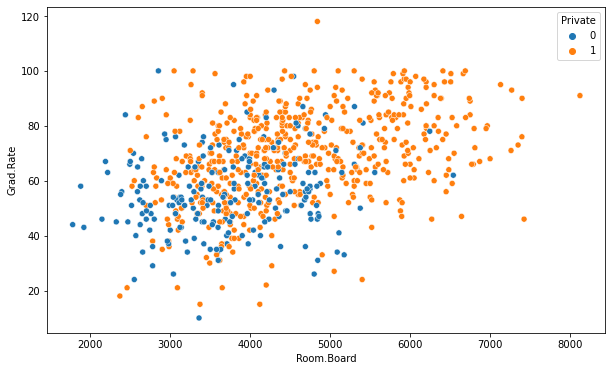

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Room.Board'], y=data['Grad.Rate'], hue=data['Private'])

<AxesSubplot:xlabel='Outstate', ylabel='F.Undergrad'>

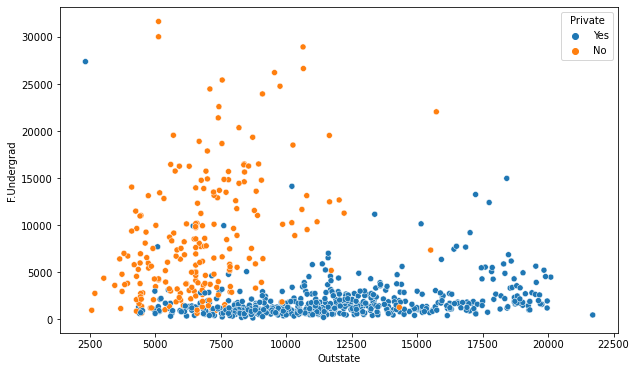

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Outstate'], y=data['F.Undergrad'], hue=data['Private'])

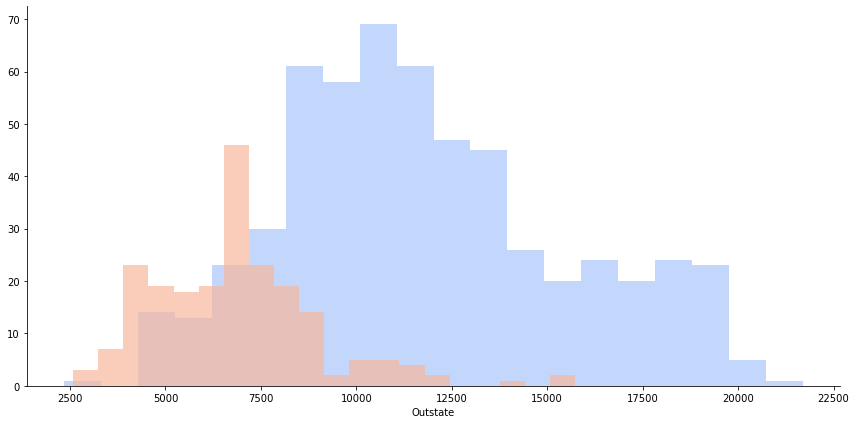

In [7]:
g = sns.FacetGrid(data,hue="Private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

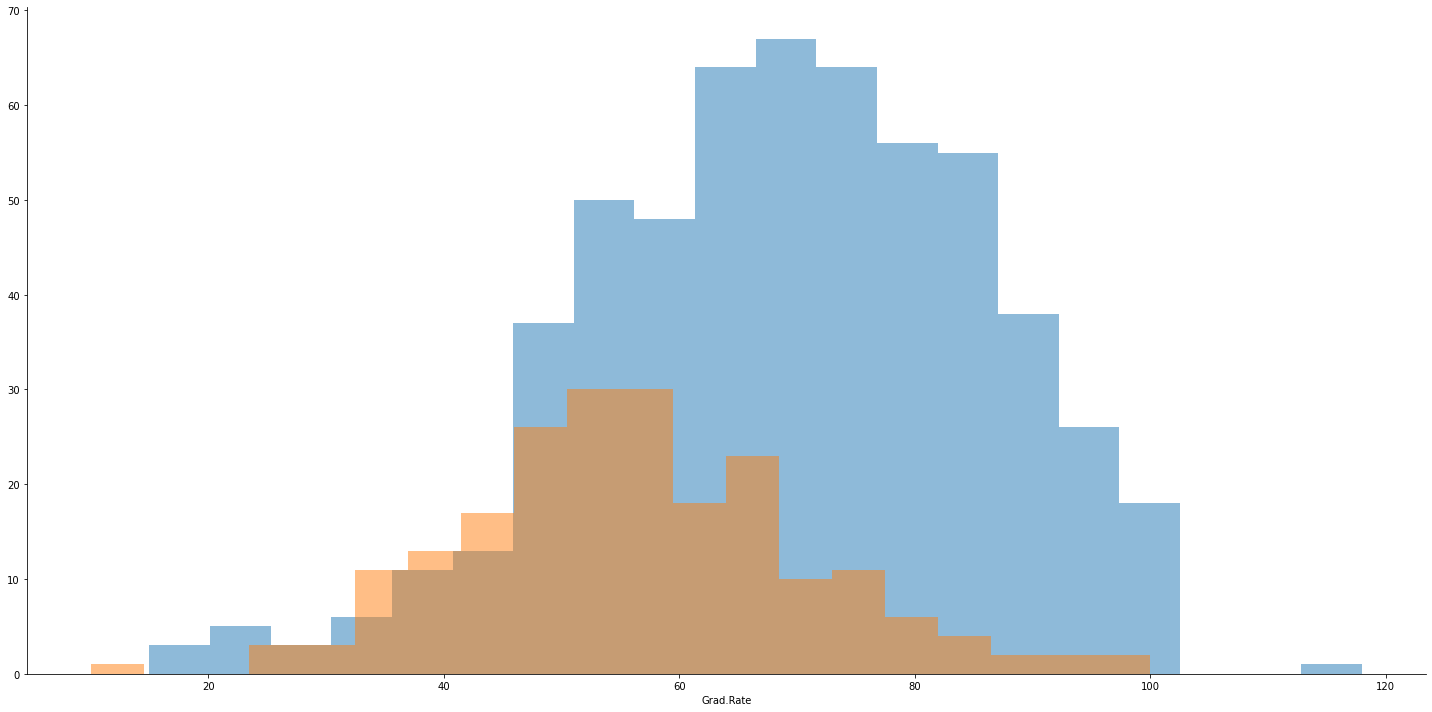

In [8]:
g = sns.FacetGrid(data, hue='Private', height=10, aspect=2)
g = g.map(plt.hist, 'Grad.Rate',bins=20,alpha=0.5)

C:\Users\saada\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


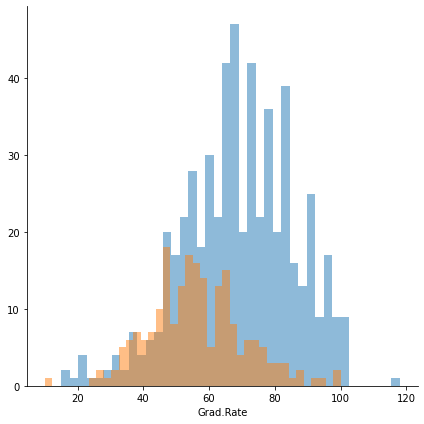

In [9]:
g = sns.FacetGrid(data, hue='Private', height=10, size=6)
g = g.map(plt.hist, 'Grad.Rate', alpha = 0.5, bins=40)

In [10]:
data['Unnamed: 0'].nunique()

777

In [11]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
def private_conventer(data):
    if data.lower() == 'yes':
        return 1
    else:
        return 0

In [13]:
data['Private'] = data['Private'].apply(private_conventer)

In [14]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    int64  
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(17)
memory usage: 109.4 KB


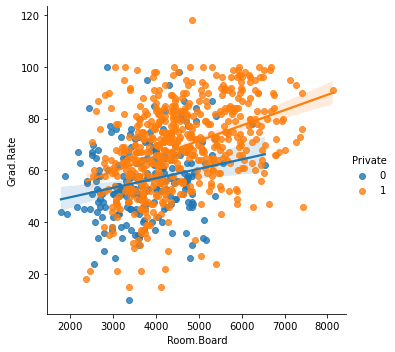

In [16]:
sns.lmplot(data=data, x='Room.Board', y='Grad.Rate', hue='Private')

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [18]:
X = data.drop('Private', axis=1)
y = data['Private']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
km = KMeans(n_clusters=2)

In [20]:
km.fit(X_train, y_train)

KMeans(n_clusters=2)

In [21]:
pred = km.predict(X_test)

In [22]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.33      0.47        54
           1       0.83      0.98      0.90       180

    accuracy                           0.83       234
   macro avg       0.82      0.66      0.69       234
weighted avg       0.83      0.83      0.80       234



In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier(n_estimators=250)

In [25]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250)

In [26]:
pridict = rf.predict(X_test)

In [27]:
print(classification_report(y_test, pridict))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        54
           1       0.96      0.97      0.97       180

    accuracy                           0.95       234
   macro avg       0.93      0.92      0.93       234
weighted avg       0.95      0.95      0.95       234

